In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import math
import cv2
import time

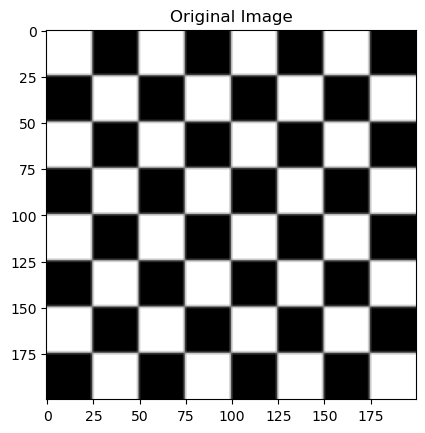

In [ ]:
# Read and display image
img = data.checkerboard()
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

#This function, dft2d, is designed to compute the 2D discrete Fourier transform of a given input array.
Parameters:

    arr: This is the input array, with dimensions (H, W).

Returns:

    F: The function returns the 2D discrete Fourier transform of the input array, also with dimensions (H, W).

Description:

The purpose of this function is to calculate the 2D discrete Fourier transform (DFT) of the input array using a specific mathematical formula. In essence, it transforms the input data from the spatial domain to the frequency domain.

Here's a breakdown of the formula used:

F(u, v) = ΣΣ arr(x, y) * exp(-2πj * ((u * x / W) + (v * y / H)))

In this formula:

    (H, W) represent the dimensions of the input array.
    (u, v) are the indices in the frequency domain.
    (x, y) are the spatial indices within the input array.
    arr(x, y) denotes the value of the input array at position (x, y).

The function iterates over each frequency index (u, v) and computes the corresponding DFT value using
same dimensions as the input array.

In [ ]:
# Fourier Transform
def dft2d(arr):
    """
    arr: input array (H,W)
    returns:
    F: 2D discrete Fourier transform of the input array (H,W)
    """
    H, W = arr.shape
    x = np.arange(W)
    y = np.arange(H)
    u = np.arange(W)
    v = np.arange(H)
    U, V = np.meshgrid(u, v)
    X, Y = np.meshgrid(x, y)
    F = np.zeros((H, W), dtype=np.complex128)
    for v_idx in range(H):
        for u_idx in range(W):
            F[v_idx, u_idx] = np.sum(arr * np.exp(-2j * np.pi * ((u_idx * X / W) + (v_idx * Y / H))))
    return F

In [ ]:
start_time = time.time()
test_array = np.random.random((100, 100))
dft_result = dft2d(test_array)
end_time = time.time()
print("Execution time for custom dft2d function:", end_time - start_time, "seconds")

Execution time for custom dft2d function: 6.446922540664673 seconds


In [ ]:
start_time = time.time()
numpy_dft_result = np.fft.fft2(test_array)
end_time = time.time()
print("Execution time for numpy.fft.fft2 function:", end_time - start_time, "seconds")

Execution time for numpy.fft.fft2 function: 0.000993967056274414 seconds


#This function, dft_ift, is designed to execute both the discrete Fourier transform (DFT) and the inverse Fourier transform (IFT) on a given input image.
Parameters:

    img: The input image, structured as (H, W).

Returns:

    img_g_real: The real part of the image after the inverse Fourier transformation.
    f_mag: The magnitude of the Fourier transformation.
    f_phase: The phase of the Fourier transformation.

Description:

This function follows a step-by-step procedure:

  1) It computes the 2D discrete Fourier transform (DFT) of the input image by utilizing np.fft.fft2.
    
  2) The zero frequency component is shifted to the center employing np.fft.fftshift.

  3) Magnitude and phase of the Fourier transform are calculated using np.abs and np.angle, respectively.

  4) The magnitude is multiplied by the exponential of the phase to obtain the modified Fourier transform.
    
  5) An inverse shift is performed utilizing np.fft.ifftshift.

  6) The inverse Fourier transform is computed using np.fft.ifft2.

  7) Finally, the function returns the real part of the image after the inverse transformation, along with the magnitude and phase of the Fourier transform.



In [ ]:
def dft_ift(img):

    F = np.fft.fftshift(np.fft.fft2(img))
    f_mag = np.abs(F)
    f_phase = np.angle(F)
    G = f_mag * np.exp(1j * f_phase)
    img_g = np.fft.ifft2(np.fft.ifftshift(G))
    img_g_real = np.real(img_g)
    return img_g_real, f_mag, f_phase

In [ ]:
img_g_real, f_mag, f_phase = dft_ift(img)

Text(0.5, 1.0, 'Original Image')

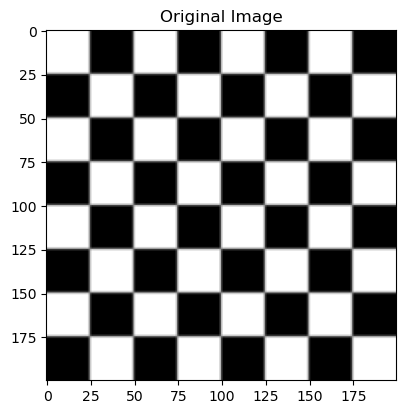

In [ ]:
# Display input and output images
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

Text(0.5, 1.0, 'Filtered Image')

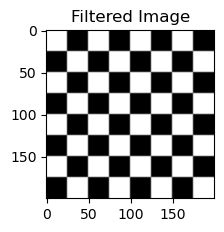

In [ ]:
plt.subplot(2, 2, 2)
plt.imshow(img_g_real, cmap='gray')
plt.title('Filtered Image')

Text(0.5, 1.0, 'Magnitude of Fourier Transform')

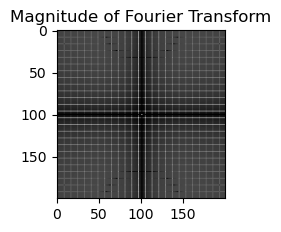

In [ ]:
plt.subplot(2, 2, 3)
plt.imshow(np.log(f_mag + 1), cmap='gray')
plt.title('Magnitude of Fourier Transform')

Text(0.5, 1.0, 'Phase of Fourier Transform')

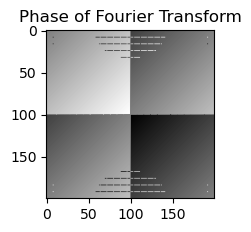

In [ ]:
plt.subplot(2, 2, 4)
plt.imshow(f_phase, cmap='gray')
plt.title('Phase of Fourier Transform')

#This filter_in_frequency_domain function applies a filter to an image utilizing the frequency domain.
Parameters:

    img: This represents the input image with dimensions (H, W).
    kernel: It denotes the filter kernel with dimensions (kH, kW).

Returns:

    f_img: The resulting image after filtering in the frequency domain.

Description:

This function executes the following steps:

 1) It calculates the 2D discrete Fourier transform (DFT) of the input image using np.fft.fft2.

 2) The filter kernel is zero-padded to match the size of the input image.

 3) The 2D DFT of the padded kernel is computed.

 4) Element-wise multiplication of the DFT of the image and the DFT of the kernel is performed.

 5) The inverse 2D Fourier transform is executed using np.fft.ifft2.

 6)Finally, the real part of the inverse transformed image is returned as the filtered image.

In [ ]:
# Filtering in Frequency Domain
def filter_in_frequency_domain(img, kernel):

    img_fft = np.fft.fft2(img)
    kernel_padded = np.zeros_like(img)
    kh, kw = kernel.shape
    kernel_padded[:kh, :kw] = kernel
    kernel_fft = np.fft.fft2(kernel_padded)
    f_img = np.fft.ifft2(img_fft * kernel_fft).real
    return f_img


This function, conv_theorem, applies a filter to an image in both the frequency and spatial domains.
Parameters:

    img: This denotes the input image with dimensions (H, W).
    kernel: It represents the filter kernel with dimensions (kH, kW).

Returns:

    f_img: The image filtered in the frequency domain.
    sp_img: The image filtered in the spatial domain.

Description:

The function executes the following steps:

  1) It applies the filter to the image in the frequency domain utilizing the filter_in_frequency_domain function.

  2)The filter is also applied to the image in the spatial domain using cv2.filter.

In [ ]:
def conv_theorem(img, kernel):
    f_img = filter_in_frequency_domain(img, kernel)
    sp_img = cv2.filter2D(img, -1, kernel)
    return f_img, sp_img

#This ideal_lpf function is designed to implement an ideal low pass filter in the frequency domain.
Parameters:

    img: The input image with dimensions (H, W).
    radius: This parameter determines the radius for the ideal low pass filter.

Returns:

    out: The output image after the low pass filter has been applied in the frequency domain.

Description:

This function executes the following steps:

  1) It calculates the 2D discrete Fourier transform (DFT) of the input image.

  2) An array named ideal_filter is initialized with zeros, maintaining the same shape as the input image.

  3) Using meshgrid, it computes the distance of each pixel in the frequency domain from the center frequency.

  4) If the corresponding distance is less than or equal to the radius, indicating that those frequencies should be preserved, the elements of ideal_filter are set to 1.

  5) Finally, it applies the filter in the frequency domain using the filter_in_frequency_domain function.

In [ ]:
def ideal_lpf(img, radius):
    H, W = img.shape
    u, v = np.meshgrid(np.arange(W), np.arange(H))
    center_u, center_v = W // 2, H // 2
    d = np.sqrt((u - center_u)**2 + (v - center_v)**2)
    ideal_filter = np.zeros_like(img)
    ideal_filter[d <= radius] = 1
    return filter_in_frequency_domain(img, ideal_filter)

This gaussian_lpf function applies a Gaussian low pass filter in the frequency domain.
Parameters:

    img: The input image with dimensions (H, W).
    std: The standard deviation used for the Gaussian low pass filter.

Returns:

    out: The resulting image after the low pass filter has been applied in the frequency domain.

Description:

This function executes the following steps:

   1) It generates a Gaussian filter in the spatial domain using meshgrid.

   2) The filter is then applied to the image in the frequency domain.

   3) The 2D discrete Fourier transform (DFT) of the input image is computed.

   4) Additionally, the 2D DFT of the Gaussian filter is computed.

   5) Element-wise multiplication of the image's DFT and the filter's DFT is
      performed.

   6) The inverse 2D Fourier transform is then executed to obtain the filtered
      image.
      
   7) Finally, the real part of the inverse transformed image is returned.

In [ ]:
def gaussian_lpf(img, std):

    H, W = img.shape
    # Generate Gaussian filter in the spatial domain
    x = np.linspace(-W//2, W//2, W)
    y = np.linspace(-H//2, H//2, H)
    X, Y = np.meshgrid(x, y)
    gaussian_filter = np.exp(-(X**2 + Y**2) / (2 * std**2))
    gaussian_filter /= np.sum(gaussian_filter)  # Normalize the filter

    # Apply the filter in the frequency domain
    img_fft = np.fft.fft2(img)
    filter_fft = np.fft.fft2(np.fft.fftshift(gaussian_filter))
    img_filtered_fft = img_fft * filter_fft
    img_filtered = np.fft.ifft2(img_filtered_fft).real
    return img_filtered

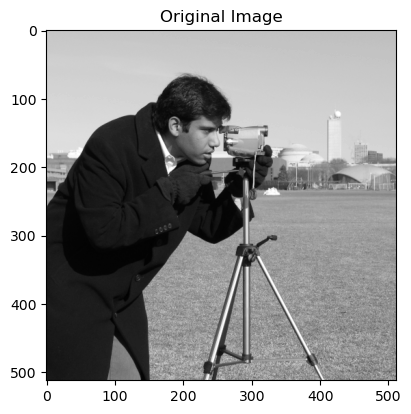

In [ ]:
camera_img = data.camera()
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(camera_img, cmap='gray')
plt.title('Original Image')
plt.show()

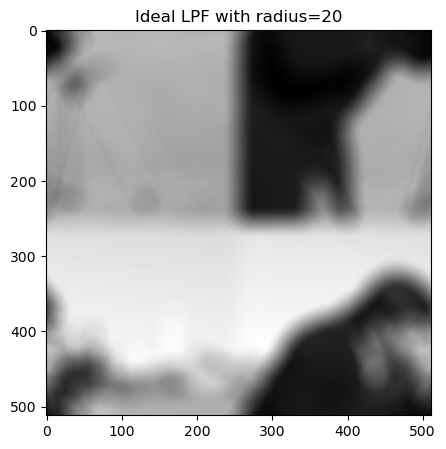

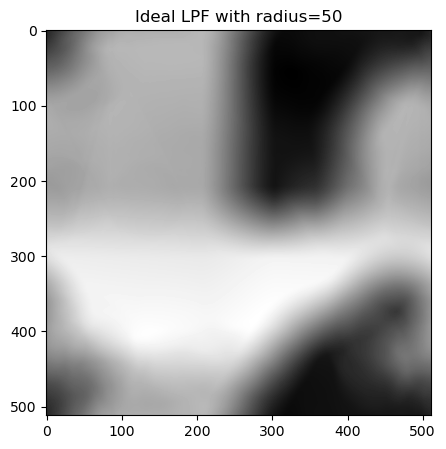

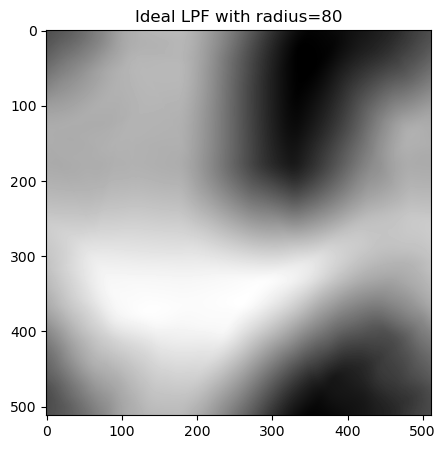

In [ ]:
for i, radius in enumerate([20, 50, 80]):
    ideal_lpf_img = ideal_lpf(camera_img, radius)
    plt.figure(figsize=(5, 5))
    plt.imshow(ideal_lpf_img, cmap='gray')
    plt.title(f'Ideal LPF with radius={radius}')
    plt.show()

#Insights from Ideal Low Pass Filtering Results

The application of an ideal low pass filter (LPF) to an image offers valuable insights into how different radii influence the filtering process and the resultant image quality.
Impact of Radius

As the radius of the ideal LPF increases, more low-frequency components are retained in the filtered image. Consequently, the images become smoother with a reduction in high-frequency noise.
Trade-off: Loss of High-Frequency Detail

However, there exists a trade-off between noise reduction and the loss of high-frequency detail. While the ideal LPF effectively eliminates high-frequency noise, it also results in the loss of fine image details. This can cause fine textures and sharp edges to appear blurred or smoothed out, particularly with larger radii.
Presence of Ringing Artifacts

In certain instances, particularly when there are sharp transitions between preserved and attenuated frequencies, the ideal LPF may introduce ringing artifacts around edges in the image. These artifacts may manifest as oscillations or ghosting effects near regions with high contrast.

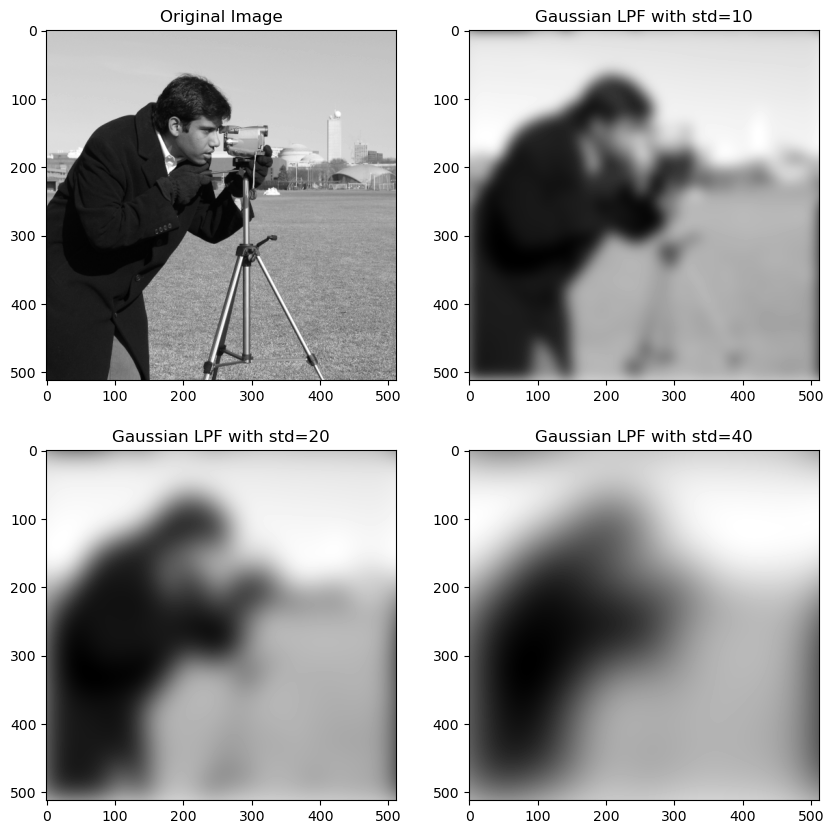

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(camera_img, cmap='gray')
plt.title('Original Image')

stds = [10, 20, 40]
for i, std in enumerate(stds):
    gaussian_lpf_img = gaussian_lpf(camera_img, std)
    plt.subplot(2, 2, i+2)
    plt.imshow(gaussian_lpf_img, cmap='gray')
    plt.title(f'Gaussian LPF with std={std}')

plt.show()

# Difference between Gaussian and Ideal Low Pass Filtering

| Aspect                  | Gaussian Low Pass Filtering | Ideal Low Pass Filtering     |
|-------------------------|-----------------------------|------------------------------|
| Frequency Response      | Exhibits a smooth Gaussian distribution| Demonstrates a sharp cutoff at a specified radius |
| Transition              | Shows a gradual transition between preserved and attenuated frequencies | Exhibits an abrupt cutoff at the specified radius |
| Image Details           |Tends to preserve more details      | May lead to the loss of fine details |
| Artifacts               | LLess likely to introduce ringing artifacts |May introduce ringing artifacts due to the Gibbs phenomenon|
| Effect on Image         | Yields a smoother filtered image | May result in a sharper but potentially more distorted image |

The selection between these methods hinges on the specific needs of the application and the desired balance between retaining details and reducing noise.
